# Fix dependencies

Install specific versions to be able to execute code

In [1]:
!pip install waymo-open-dataset-tf-2-6-0
!pip install keras==2.6.*
!pip install tensorflow==2.6.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 3.7 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 7.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.1/215.1 kB 5.3 MB/s

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=892ea71cf282171b6e0068d927b34605ee32d939e57d20179ab97c72fc784ac1
  Stored in directory: /root/.cache/pip/wheels/f1/60/77/22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built clang
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.2.0
    Uninstalling Pillow-7.2.0:
      Successfully uninstalled Pillow-7.2.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
ERROR: pip's dependency resolver does n

# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset

In [3]:
dataset = get_dataset("/app/project/data/test/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/test/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/test/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy

# color mapping of classes (defined outside of function to avoid calling each time function is called)
colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

def show_image(image, gt_boxes, gt_classes):
    """
    This functions takes an image, groundtruth boxes and classes and
    shows image with groundtruth boxes
    """
    # Create a subplot
    f, ax = plt.subplots()
    
    # Set image
    ax.imshow(image.astype(numpy.uint8))
    
    # Iterate over boxes and classes and add rectangles to plot
    for box, clas in zip(gt_boxes, gt_classes):
        # Extract each rectangle point
        y1, x1, y2, x2 = box
        
        # Generate rectangle
        rect = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=colormap[clas])
        
        # Add rectangle to image
        ax.add_patch(rect)
        
    # Disable axises
    ax.axis('off')
    
    # Show image
    plt.show()

In [5]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # Get image and related data
    image = batch['image'].numpy()
    height, width, channel = image.shape
    #print(f'height: {height}, width: {width}, channel: {channel}')
    
    # Extract groundtruth data. Boxes and classes
    gt_boxes = batch['groundtruth_boxes'].numpy()
    gt_classes = batch['groundtruth_classes'].numpy()
    
    # Resize boxes to image
    gt_boxes[:,[0,2]] *= height
    gt_boxes[:,[1,3]] *= width
    
    # Display image with groundtruth boxes
    show_image(image, gt_boxes, gt_classes)
    
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 640x480 with 0 Axes>

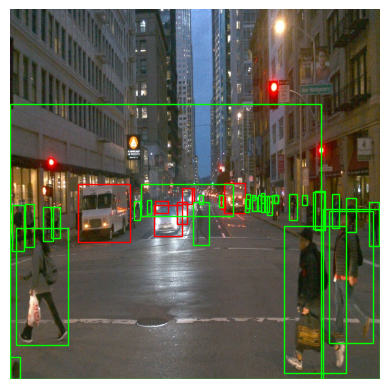

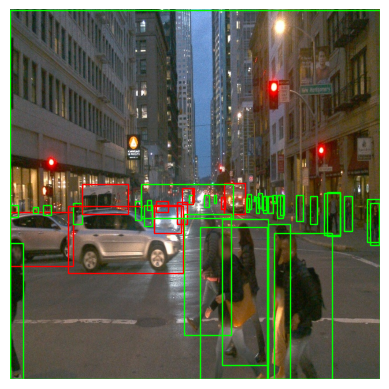

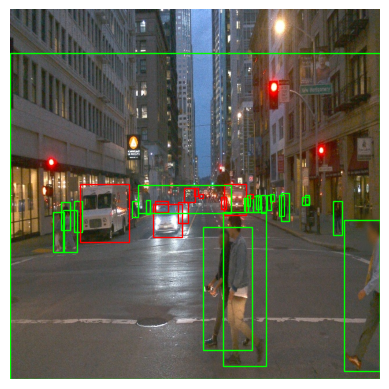

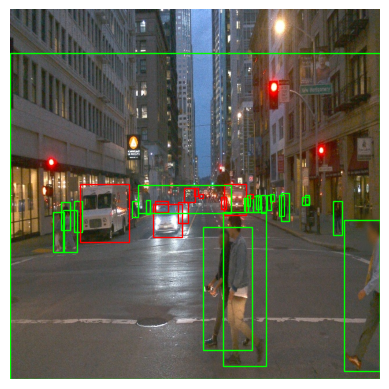

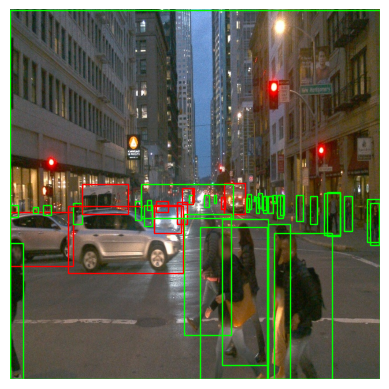

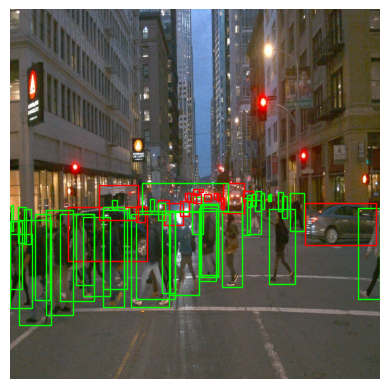

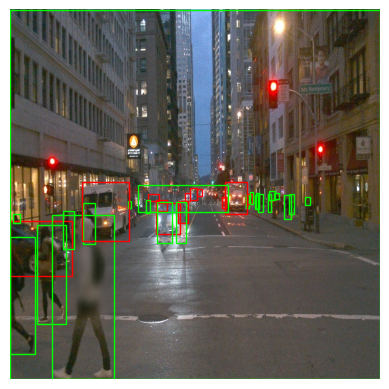

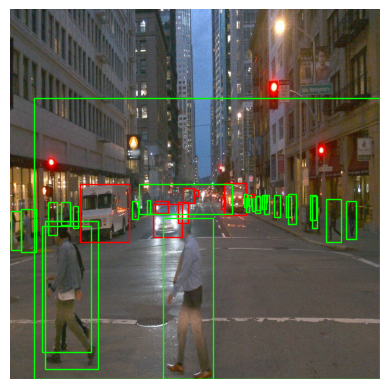

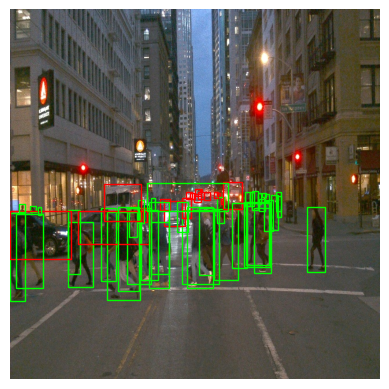

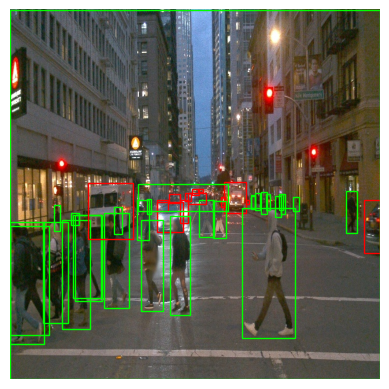

In [6]:
# Take 10 random images from list and save in test set
NUM_OF_IMG_TO_DISPLAY=10
test_set = dataset.shuffle(500).take(NUM_OF_IMG_TO_DISPLAY)

# Need to be able to see images on jupyter notebook
%matplotlib inline

# Create new figure
plt.figure()

# Iterate over set and display images
for data in test_set:
    display_instances(data)

# Close figure window
plt.close()



## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...